<a href="https://colab.research.google.com/github/Nsrsaeed/Dell-Training-ENEC-/blob/main/Weather_abudhabhi_5yr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -----------------------------------------------------------
# Advanced 5-Year Abu Dhabi Weather Data (Open-Meteo Archive)
# -----------------------------------------------------------
import pandas as pd
import requests
from datetime import date

# Abu Dhabi coordinates
LAT, LON = 24.4539, 54.3773

# Date range (last 5 years)
start_date = "2019-01-01"
end_date = date.today().strftime("%Y-%m-%d")

# Request multiple variables
url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={LAT}&longitude={LON}"
    f"&start_date={start_date}&end_date={end_date}"
    "&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,"
    "apparent_temperature_max,apparent_temperature_min,"
    "precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,"
    "windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,"
    "shortwave_radiation_sum,et0_fao_evapotranspiration,"
    "sunshine_duration,pressure_msl_min,pressure_msl_max"
    "&timezone=Asia/Dubai"
)

# Fetch data
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data["daily"])
df["time"] = pd.to_datetime(df["time"])

# Save dataset
df.to_csv("abu_dhabi_weather_5yrs_full.csv", index=False)
print(f"✅ Saved {len(df)} days of data to abu_dhabi_weather_5yrs_full.csv")

# Preview
df.head()


✅ Saved 2514 days of data to abu_dhabi_weather_5yrs_full.csv


,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,sunshine_duration,pressure_msl_min,pressure_msl_max
0,2019-01-01,25.0,17.5,21.5,25.0,18.1,0.0,0.0,0.0,0.0,14.6,28.4,26,15.02,3.09,33226.16,1019.4,1023.4
1,2019-01-02,26.7,18.6,22.0,26.3,19.5,0.0,0.0,0.0,0.0,16.2,28.4,56,15.09,3.29,33415.02,1018.5,1022.3
2,2019-01-03,29.3,17.5,22.8,28.0,17.2,0.0,0.0,0.0,0.0,18.6,33.1,141,15.05,3.65,33058.73,1017.6,1022.4
3,2019-01-04,25.1,18.6,21.8,25.7,17.7,0.0,0.0,0.0,0.0,30.5,44.3,297,14.80,3.76,33289.27,1018.6,1021.3
4,2019-01-05,23.4,19.2,21.4,22.1,17.6,0.0,0.0,0.0,0.0,30.0,43.9,314,15.54,4.20,33609.33,1018.3,1022.1


| **Column Name**              | **Description**                                       | **Unit**        | **Details / Notes**                                                  |
| ---------------------------- | ----------------------------------------------------- | --------------- | -------------------------------------------------------------------- |
| `time`                       | Date of the recorded observation                      | YYYY-MM-DD      | Represents the daily timestamp (Dubai timezone).                     |
| `temperature_2m_max`         | Maximum air temperature at 2 meters above ground      | °C              | Daily high temperature recorded for that day.                        |
| `temperature_2m_min`         | Minimum air temperature at 2 meters above ground      | °C              | Daily lowest temperature recorded for that day.                      |
| `temperature_2m_mean`        | Mean air temperature at 2 meters above ground         | °C              | Average of hourly temperatures across the day.                       |
| `apparent_temperature_max`   | Maximum “feels-like” temperature                      | °C              | Includes the effect of humidity and wind on how hot it feels.        |
| `apparent_temperature_min`   | Minimum “feels-like” temperature                      | °C              | “Feels-like” low temperature considering humidity and wind.          |
| `precipitation_sum`          | Total precipitation (rain + snow + other forms)       | mm              | Combined total of all precipitation types in a day.                  |
| `rain_sum`                   | Total rainfall                                        | mm              | Portion of total precipitation that fell as liquid rain.             |
| `snowfall_sum`               | Total snowfall                                        | cm              | Snow equivalent recorded for that day (usually 0 in Abu Dhabi).      |
| `precipitation_hours`        | Number of hours with measurable precipitation         | hours           | Duration when precipitation occurred during the day.                 |
| `windspeed_10m_max`          | Maximum wind speed at 10 meters above ground          | km/h            | Peak sustained wind speed observed daily.                            |
| `windgusts_10m_max`          | Maximum wind gust at 10 meters                        | km/h            | Short-term peak gust speed (instantaneous).                          |
| `winddirection_10m_dominant` | Dominant wind direction                               | degrees (0–360) | Average direction of prevailing winds (0° = North, 90° = East).      |
| `shortwave_radiation_sum`    | Total shortwave solar radiation received              | MJ/m²           | Sum of solar radiation during daylight hours.                        |
| `et0_fao_evapotranspiration` | Reference evapotranspiration (FAO-56 Penman-Monteith) | mm/day          | Proxy for potential evaporation, useful in agriculture/climate.      |
| `sunshine_duration`          | Total sunshine duration                               | seconds         | Number of seconds with direct sunlight exposure per day.             |
| `pressure_msl_min`           | Minimum mean sea level pressure                       | hPa             | Lowest atmospheric pressure recorded that day (sea level adjusted).  |
| `pressure_msl_max`           | Maximum mean sea level pressure                       | hPa             | Highest atmospheric pressure recorded that day (sea level adjusted). |


In [3]:
df.describe()

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,sunshine_duration,pressure_msl_min,pressure_msl_max
count,2514,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.0,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,2022-06-10 11:59:59.999999744,33.106285,25.236993,28.731146,34.533095,27.509228,0.179714,0.179714,0.0,0.200875,23.138823,39.401432,218.411695,20.990306,6.014360,37805.526838,1006.810103,1010.159228
min,2019-01-01 00:00:00,18.300000,13.300000,17.000000,13.400000,8.500000,0.000000,0.000000,0.0,0.000000,9.200000,18.000000,0.000000,5.990000,2.000000,1655.320000,990.000000,992.900000
25%,2020-09-20 06:00:00,27.300000,20.400000,23.600000,27.100000,20.225000,0.000000,0.000000,0.0,0.000000,18.800000,33.800000,71.000000,17.272500,4.580000,35746.577500,1000.100000,1003.200000
50%,2022-06-10 12:00:00,34.100000,25.800000,29.650000,35.700000,28.100000,0.000000,0.000000,0.0,0.000000,22.600000,38.500000,291.000000,22.050000,6.130000,39109.530000,1007.700000,1011.400000
75%,2024-02-28 18:00:00,38.400000,30.000000,33.800000,42.000000,34.900000,0.000000,0.000000,0.0,0.000000,26.500000,43.600000,319.000000,24.450000,7.280000,40167.452500,1013.600000,1017.300000
max,2025-11-18 00:00:00,46.500000,35.800000,39.100000,49.800000,42.400000,67.700000,67.700000,0.0,21.000000,51.200000,81.000000,360.000000,27.470000,12.380000,44608.450000,1022.900000,1026.300000
std,NaN,6.577466,5.372844,5.581373,8.386427,8.050620,2.405945,2.405945,0.0,1.215295,6.074824,8.054137,128.395183,4.286053,1.744508,4698.046101,7.755879,8.044292


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        2514 non-null   datetime64[ns]
 1   temperature_2m_max          2514 non-null   float64       
 2   temperature_2m_min          2514 non-null   float64       
 3   temperature_2m_mean         2514 non-null   float64       
 4   apparent_temperature_max    2514 non-null   float64       
 5   apparent_temperature_min    2514 non-null   float64       
 6   precipitation_sum           2514 non-null   float64       
 7   rain_sum                    2514 non-null   float64       
 8   snowfall_sum                2514 non-null   float64       
 9   precipitation_hours         2514 non-null   float64       
 10  windspeed_10m_max           2514 non-null   float64       
 11  windgusts_10m_max           2514 non-null   float64     

--- Univariate Analysis: temperature_2m_max ---

Basic Facts (Descriptive Statistics):
count    2514.000000
mean       33.106285
std         6.577466
min        18.300000
25%        27.300000
50%        34.100000
75%        38.400000
max        46.500000
Name: temperature_2m_max, dtype: float64


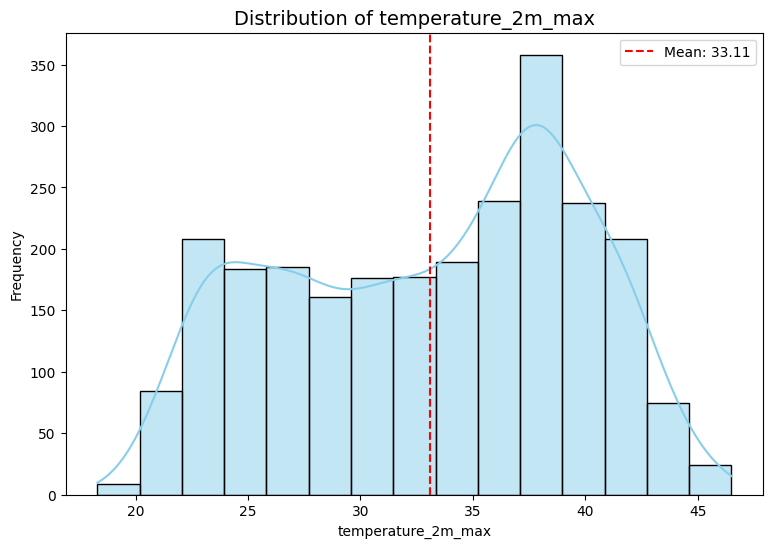

--------------------------------------------------


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# 4. STEP 3 & 4: UNIVARIATE ANALYSIS AND VISUALIZATION
#
# We examine one clue at a time (Univariate Analysis) .
# -----------------------------------------------------------------------------

print("--- Univariate Analysis: temperature_2m_max ---")

# Descriptive Stats: Gather basic facts
print("\nBasic Facts (Descriptive Statistics):")
print(df['temperature_2m_max'].describe())
# The mean score should be close to 78, as observed in the analysis

# Visualization: Histogram
# Shows the distribution of scores
plt.figure(figsize=(9, 6))
sns.histplot(df['temperature_2m_max'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of temperature_2m_max', fontsize=14)
plt.xlabel('temperature_2m_max')
plt.ylabel('Frequency')
plt.axvline(df['temperature_2m_max'].mean(), color='red', linestyle='--', label=f'Mean: {df["temperature_2m_max"].mean():.2f}')
plt.legend()
plt.show()

# Insight: The chart shows scores 'bunched up right around the average of 78' .
# The visual distribution should clearly show the 'little tail stretching out to the left' (left skew) .
print("-" * 50)

--- Bivariate Analysis: windspeed_10m_max vs. temperature_2m_max ---


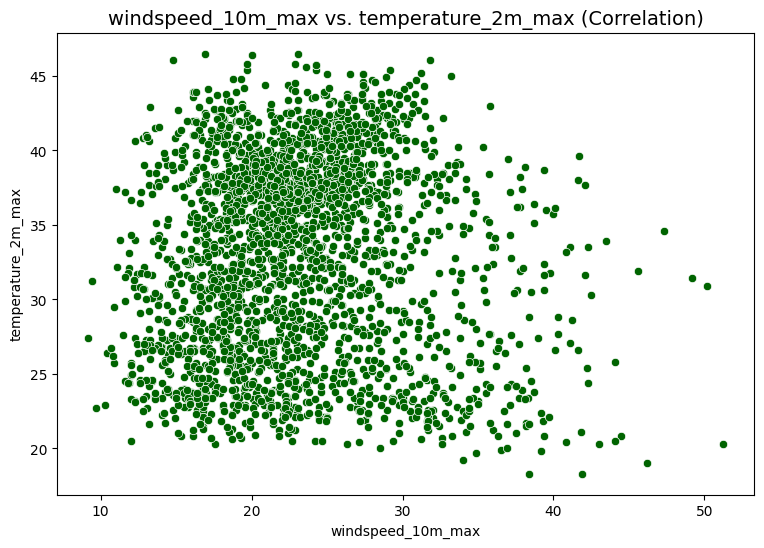

Scatter plot shows the relationship between windspeed and temperature.
--------------------------------------------------


In [7]:

# -----------------------------------------------------------------------------
# 5. STEP 4: BIVARIATE ANALYSIS (Connecting the Dots)
#
# We examine two pieces of evidence together . We test windspeed_10m_max vs. temperature_2m_max.
# -----------------------------------------------------------------------------

print("--- Bivariate Analysis: windspeed_10m_max vs. temperature_2m_max ---")

# Scatter Plot: Look for links between windspeed_10m_max and temperature_2m_max
plt.figure(figsize=(9, 6))
sns.scatterplot(x='windspeed_10m_max', y='temperature_2m_max', data=df, color='darkgreen')
plt.title('windspeed_10m_max vs. temperature_2m_max (Correlation)', fontsize=14)
plt.xlabel('windspeed_10m_max')
plt.ylabel('temperature_2m_max')
plt.show()

# Observation: We will analyze the trend between windspeed and temperature.
print("Scatter plot shows the relationship between windspeed and temperature.")
print("-" * 50)

                             count                 mean                  min  \
time                          2508  2022-06-07 12:00:00  2019-01-01 00:00:00   
temperature_2m_max          2508.0            33.112281                 18.3   
temperature_2m_min          2508.0            25.244737                 13.3   
temperature_2m_mean         2508.0            28.737281                 17.0   
apparent_temperature_max    2508.0            34.539952                 13.4   
apparent_temperature_min    2508.0            27.517624                  8.5   
precipitation_sum           2508.0             0.180144                  0.0   
rain_sum                    2508.0             0.180144                  0.0   
snowfall_sum                2508.0                  0.0                  0.0   
precipitation_hours         2508.0             0.201356                  0.0   
windspeed_10m_max           2508.0            23.161962                  9.2   
windgusts_10m_max           2508.0      

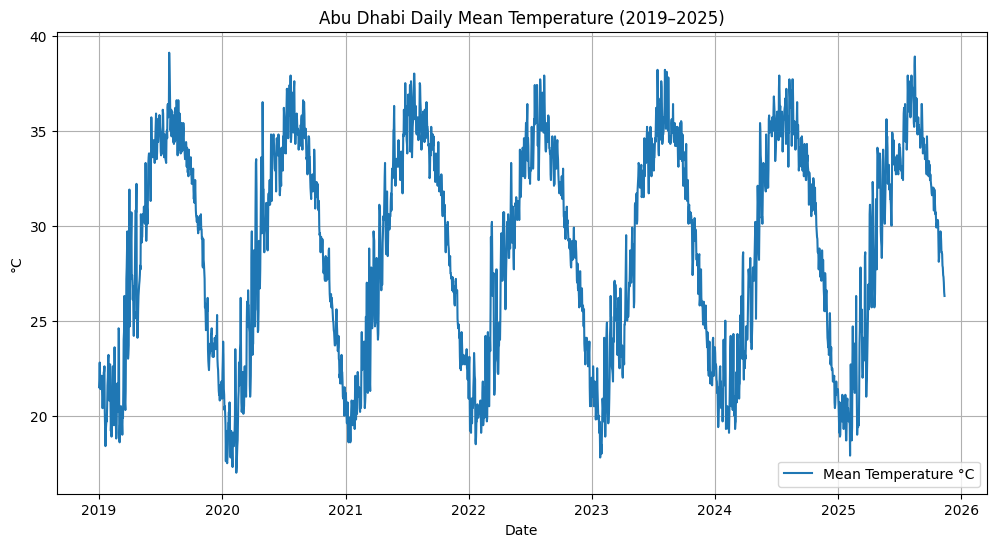

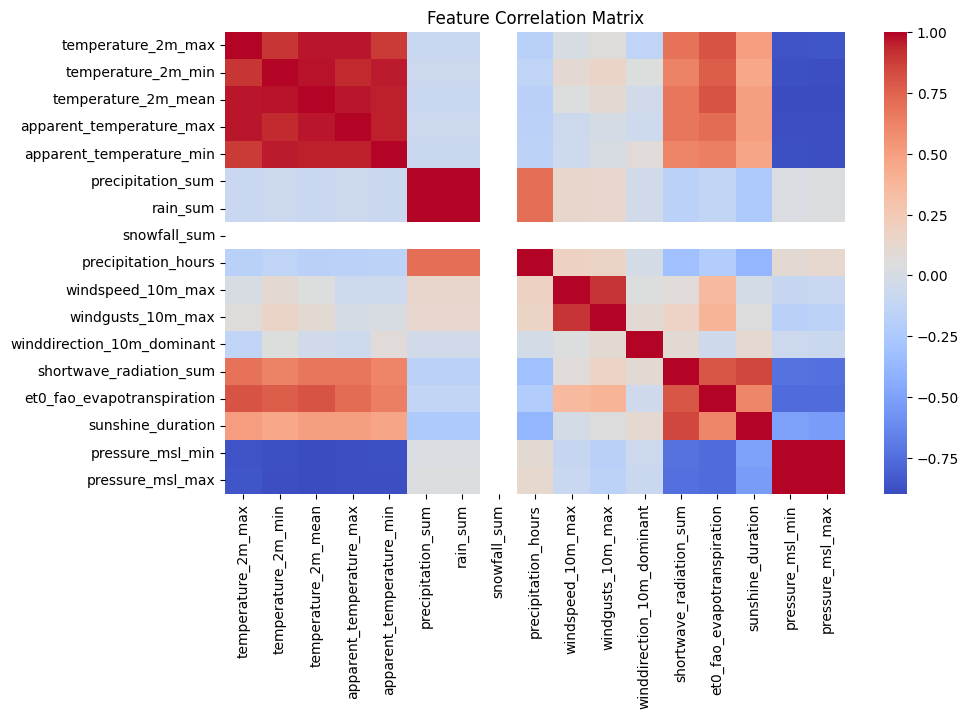

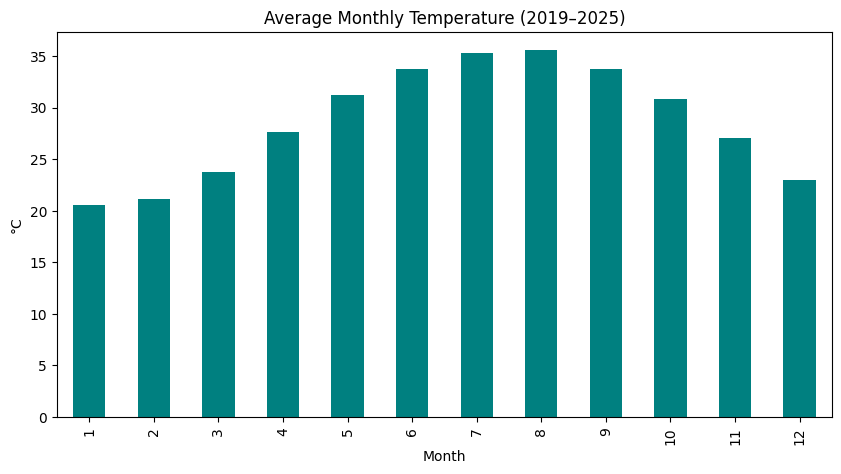

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("abu_dhabi_weather_5yrs_full.csv")
df["time"] = pd.to_datetime(df["time"])

# Summary
print(df.describe().T)

# Temperature trend
plt.figure(figsize=(12,6))
plt.plot(df["time"], df["temperature_2m_mean"], label="Mean Temperature °C")
plt.title("Abu Dhabi Daily Mean Temperature (2019–2025)")
plt.xlabel("Date"); plt.ylabel("°C"); plt.legend(); plt.grid(True)
plt.show()

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes("number").corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix"); plt.show()

# Seasonal average temperatures
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
monthly_avg = df.groupby("month")["temperature_2m_mean"].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(kind="bar", color="teal")
plt.title("Average Monthly Temperature (2019–2025)")
plt.xlabel("Month"); plt.ylabel("°C"); plt.show()
